<h1><center>Bike Sharing Dataset</center></h1>

**Analysis by Edgar Ortega**

Dataset obtained from the UCI Machine Learning Respository: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Background 
Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental, and returns has become automatic. Through these systems, a user is able to easily rent a bike from a particular location and return it at another location.

While using this bike sharing service the duration of travel, departure, and arrival positions are explicitly recorded. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most important events in the city could be detected by monitoring this data.


## Dataset Potential 
=========================================

It is believed that bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance rental behavior can be affected by, weather conditions, precipitation, day of week, season, hour of the day, etc. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. The data was aggregated on an hourly and daily basis. Then the corresponding weather and seasonal information was added from http://www.freemeteo.com. 


## Tasks
=========================================


-Effects of town events on number of bike rentals

-How weather effects the number of bike rentals

-Predict the bike rental count hourly or daily based on the environmental and seasonal settings.

<h1><center>How Town Events Effect Bike Rentals</center></h1>

Figures 1 and 2 depict the number of registered and unregistered users during a particular day between years 2011 and 2012. Data points within the green shaded region correspond to data from 2012. There were 365 days in 2011 and 366 days in 2012. Thus, days on the x-axis between 1 and 365 correspond to year 2011 and days 366 through 731 correspond to year 2012. 

By taking a look at the number of registered users who used this bike share serives on a particular day in 2011 and 2012 **(Figure 1)**, we see a general increase in the number of registered users over time. However, there doesn't seem to be any sudden increase in users for any particular day. Which is what we would expect to see during an event.

The best way to see the effects of town events on bike rentals, is to look at the number of unregistered (casual) users we have on a given day. 

<h3><center>Figure 1</center></h3>

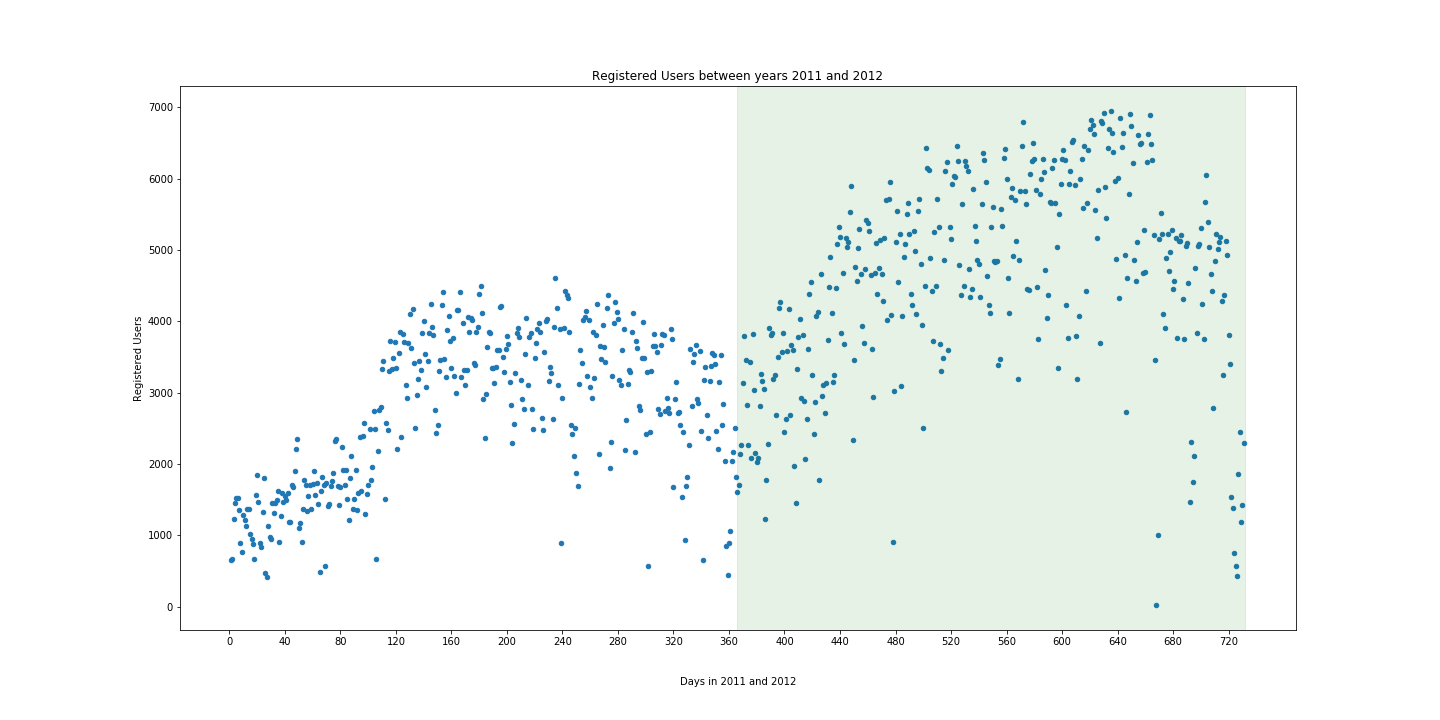

In **figure 2**, we see that the number of unregistered users using the serivice is more scattered. But, we are now able to point out days where there is a spike in usage. 

Lets look at a day in 2011 and 2012 where we see the highest count of unregistered users. These are the larger red dots in **figure 2**. In 2011 this point lies between days 160 and 200. While in 2012 this point lies between days 480 and 520.

**The left 🔴 corresponds to date (2011-07-04).**

**The right 🔴 corresponds to date (2012-05-19).**

The day with the highest count of unregistered users in 2011 was during the Fourth of July. This makes sense, but what caused the highest count in 2012? A Google search of Washington DC 2012-05-19 brought up an event called 'Survive DC', which occured on that day. This is an example of how we are able to see a correlation between town events and number of unregistered users using the bike share service.

<h3><center>Figure 2</center></h3>

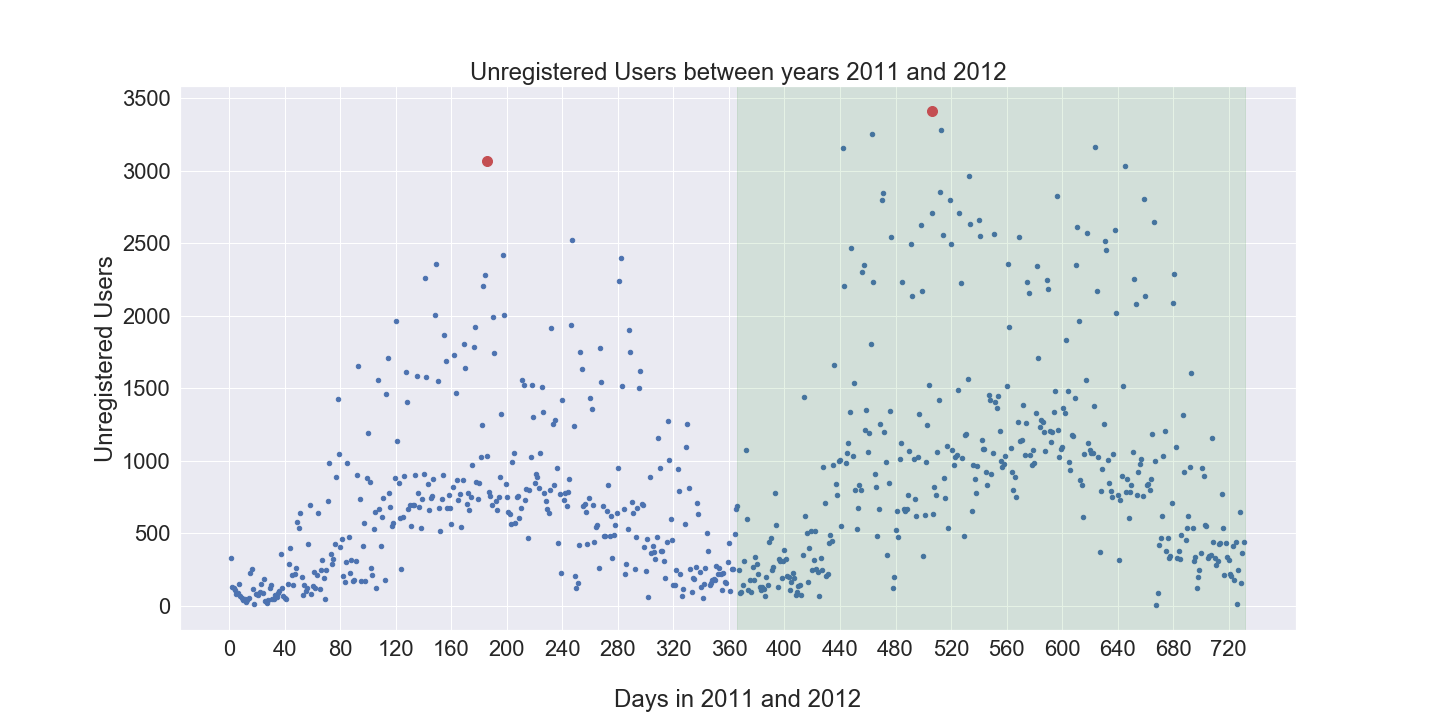

<h1><center>Exploratory Data Analysis </center></h1> 

### **Weather effects on bike rentals**

**Figures 3, 4, and 5** are box plots depicting the relationship between number of rentals per hour and weather conditions. A fourth weather condition corresponding to harsh weather only had 3 data points, and was omitted from the plots. This suggests that users prefered not to use the service during harsh weather, which is to be expected.

In **Figure 3** we see the count of casual bike users per hour plotted against weather conditions. Most of the usage from casual renters comes between the hours of 12PM to 6PM when the weather is clear.

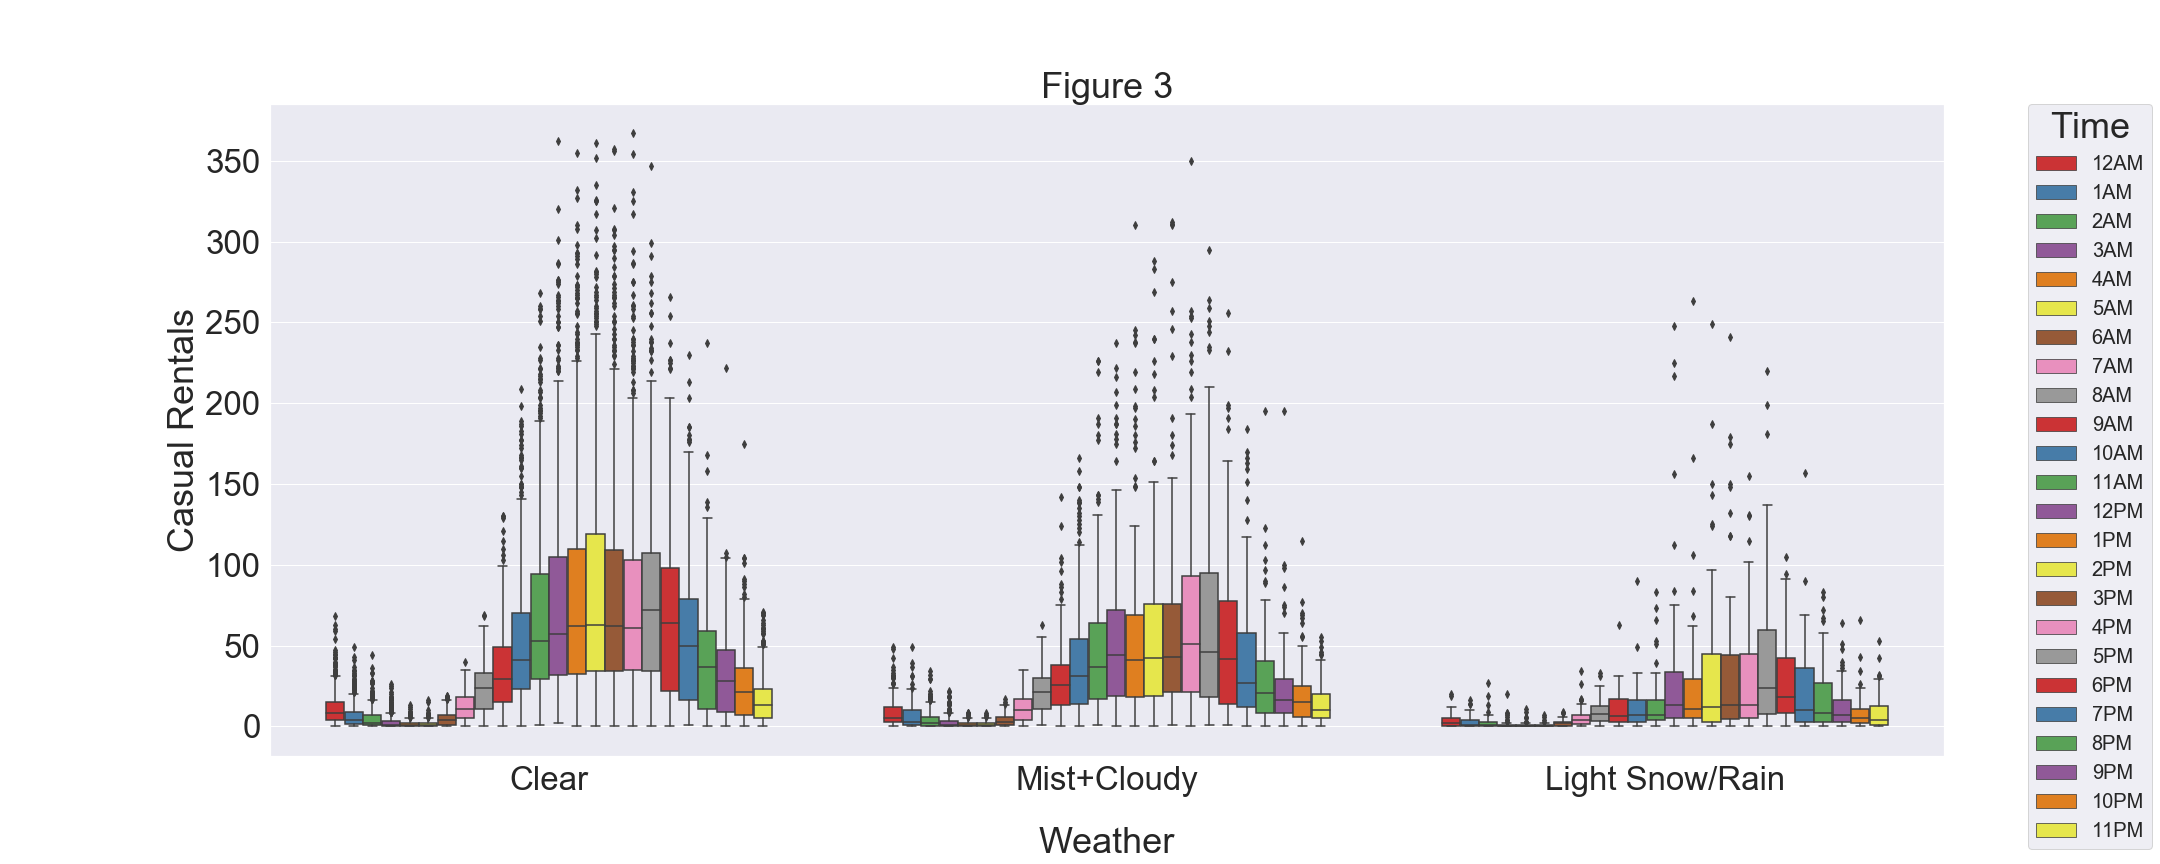

**Figures 4 and 5** show the count of registered bike users per hour plotted against weather conditions. **Figure 5** provides a zoomed in look into weather conditions 'Clear' and 'Mist+Cloudy'. There is a noticeable increase in hourly usage compared to casual renters. Notice the significant increase between hours 7AM-8AM and 5PM-6PM. Based on these plots, we can assume many of the registered bike users use these bikes as part of their daily commute during most weather conditions. However, most registered users prefer to use the bikes during Clear or Misty/Cloudy conditions. 

**Recommendations:** Stock more bikes near public transport stations in the mornings, and near offices/businesses in the afternoon. This will help daily commuters get to and from work, which will result in a potential increase in bike rentals.

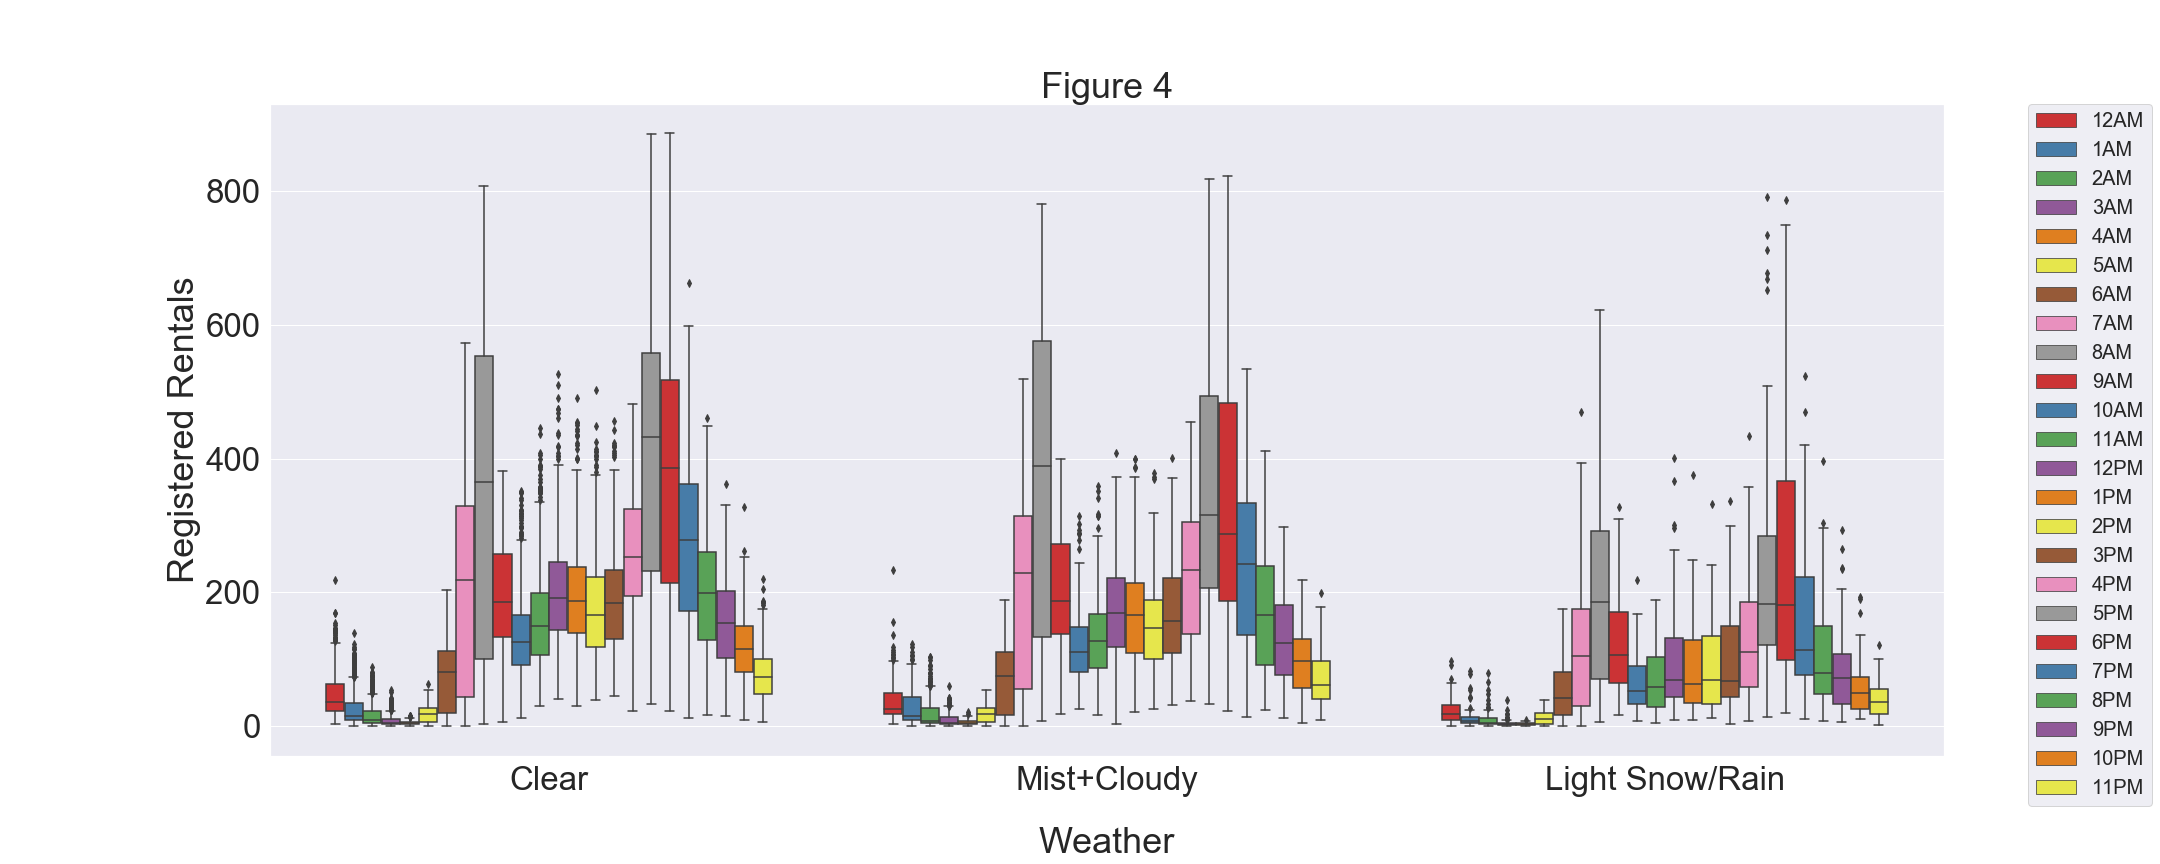

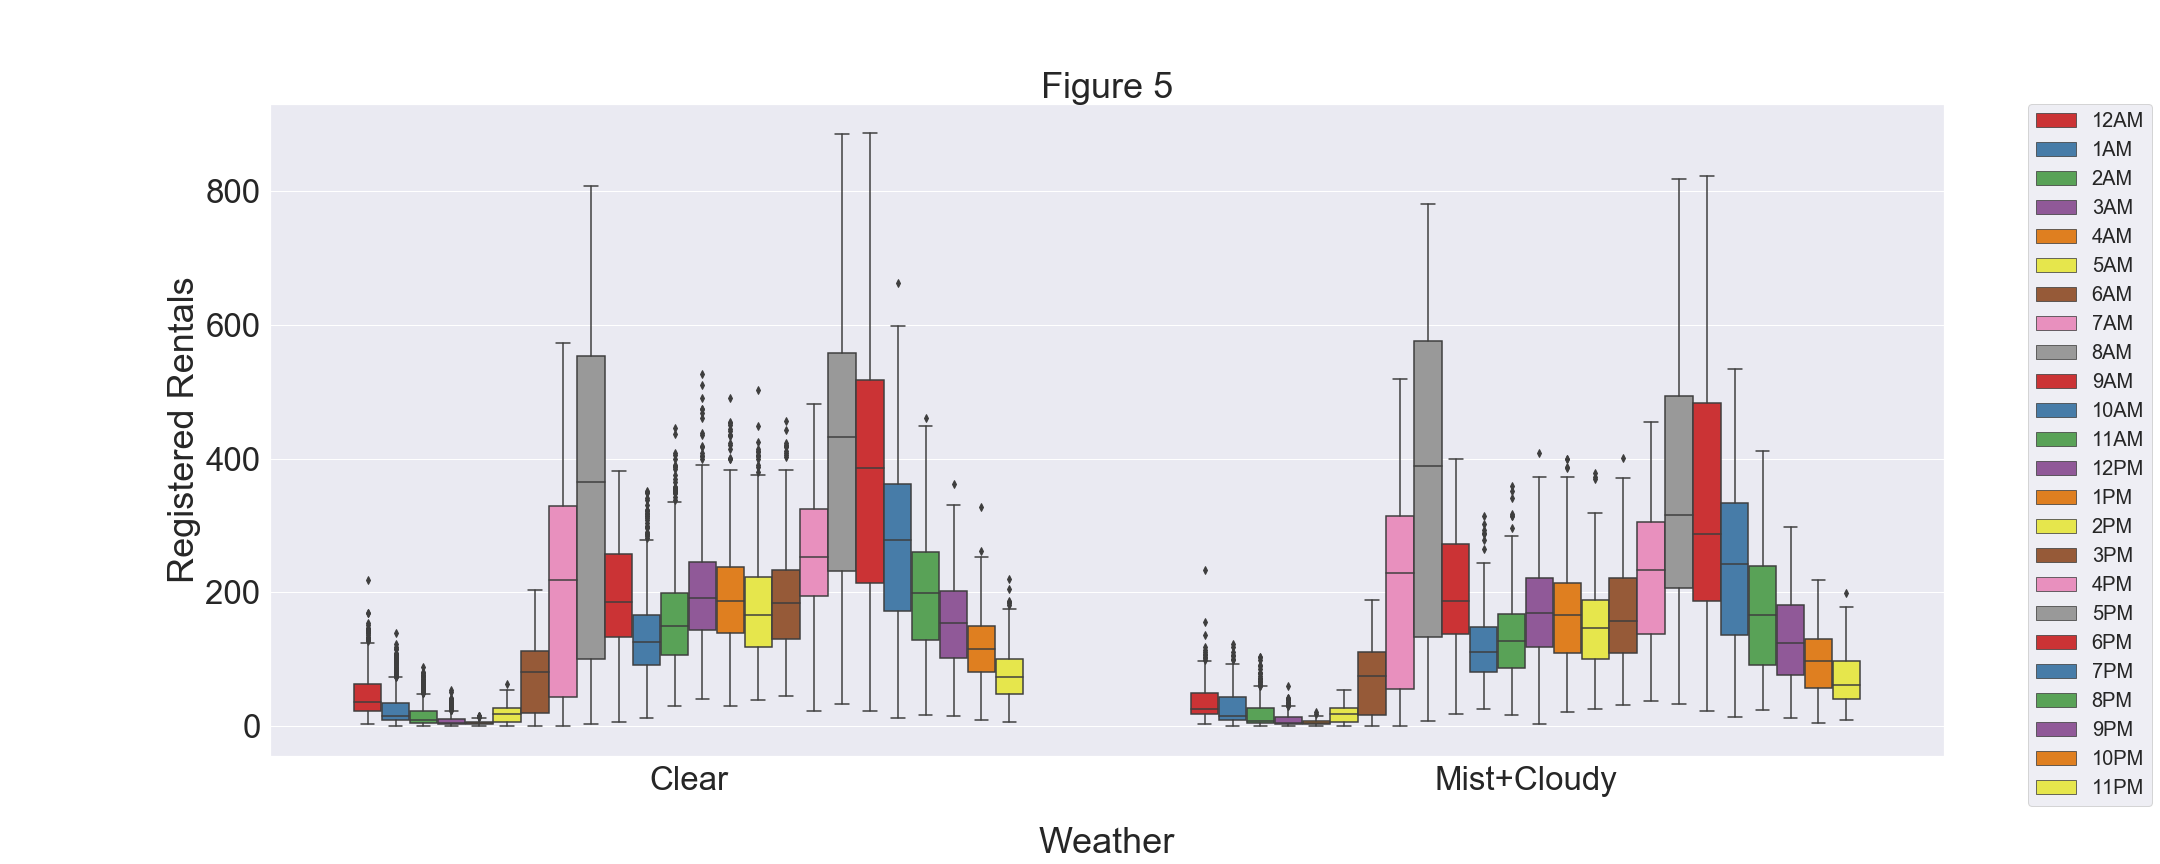

### **Prediction Model Evaluation Results**

**R-Squared = 0.9287151360253384**<br>
**RMSE = 0.38098800498170465**<br>
**RMSLE = 0.3560941706980212**

<h1><center>Building Plots and Prediction Model</center></h1>
<h2><center>Using Python</center></h2>

### **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
import numpy as np
import seaborn as sns

**Read data from csv file and look at header**

- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours

- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days


- instant: record index
	- **dteday** : date
	- **season** : season (1:springer, 2:summer, 3:fall, 4:winter)
	- **yr** : year (0: 2011, 1:2012)
	- **mnth** : month ( 1 to 12)
	- **hr** : hour (0 to 23)
	- **holiday** : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- **weekday** : day of the week
	- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ **weathersit** : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- **temp** : Normalized temperature in Celsius. The values are divided to 41 (max)
	- **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- **hum**: Normalized humidity. The values are divided to 100 (max)
	- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
	- **casual**: count of casual users
	- **registered**: count of registered users
	- **cnt**: count of total rental bikes including both casual and registered

In [104]:
hr = pd.read_csv('hour.csv')
# day = pd.read_csv('day.csv')

bike_prep = hr.copy().drop(['instant','casual','dteday','registered'],axis=1)

In [105]:
hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [106]:
bike_prep.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


### **Creating Scatter Plots casual(Unregistered) rentals vs. day number**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


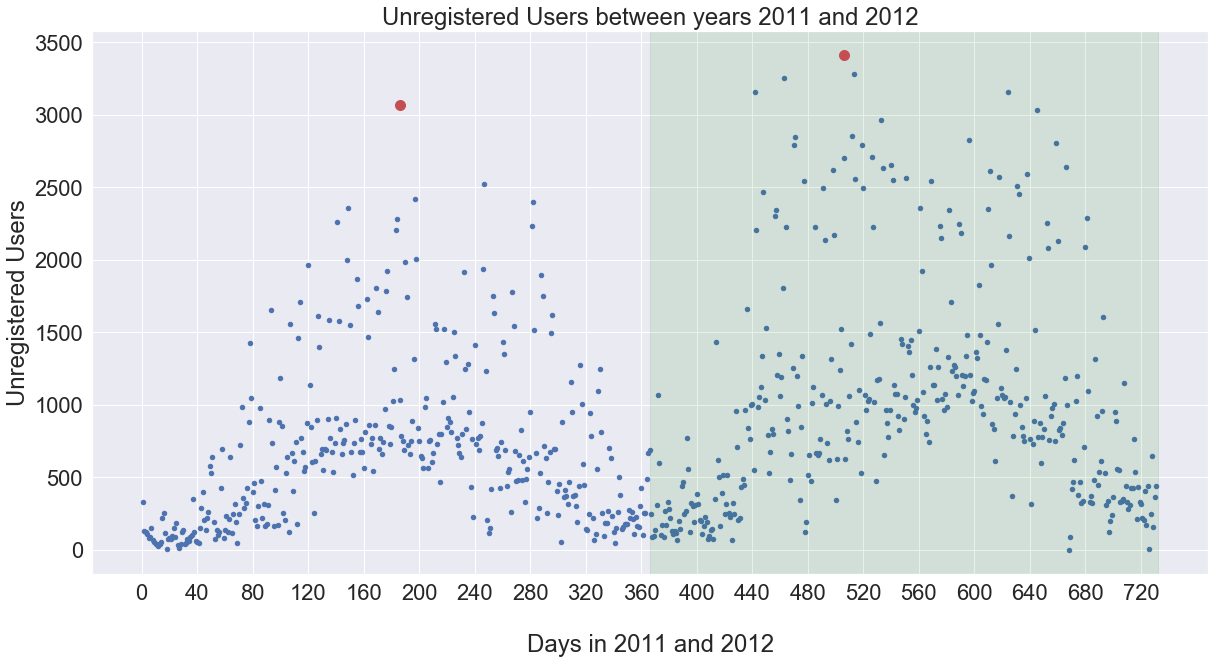

In [146]:
sns.set(font_scale=2)
day.plot.scatter(x='instant',y='casual',figsize=(20,10),xticks=(np.arange(0,731,40)))
plt.plot(day['instant'][185],day['casual'][184],'ro',markersize=10)
plt.plot(day['instant'][505],day['casual'][504],'ro',markersize=10)
plt.axvspan(366, 732, alpha=0.1, color='green')
plt.title('Unregistered Users between years 2011 and 2012')
plt.xlabel('Days in 2011 and 2012',labelpad=30)
plt.ylabel('Unregistered Users')
# plt.savefig('Unregistered.png')

**Grabbing the dates corresponding to the highest count of unregistered users in 2011 and 2012.**

In [7]:
day[day['casual']==day['casual'].loc[150:200].max()]


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043


In [8]:
day[day['casual']==day['casual'].loc[480:520].max()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
504,505,2012-05-19,2,1,5,0,6,0,1,0.6,0.566908,0.45625,0.083975,3410,4884,8294


I want to change some of the columns in DataFrames **hr** and **day**. Notice how the column 'weekday' has numbers 0-6 to represent the days of the week. I want those values to be (Mon,Tue,Wed,Thur,Fri,Sat,Sun) instead. This should make the box plots below a little easier to read. I'll make similar changes to to following columns season,yr,mnth,hr,and weathersit.

In [9]:
hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Build a dictionary to hold corresponding values**

In [10]:
dys = {0:'Mon',1:'Tues',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
hrs = {0:'12AM',1:'1AM',2:'2AM',3:'3AM',4:'4AM',5:'5AM',6:'6AM',7:'7AM',8:'8AM',9:'9AM',10:'10AM',11:'11AM',12:'12PM',
      13:'1PM',14:'2PM',15:'3PM',16:'4PM',17:'5PM',18:'6PM',19:'7PM',20:'8PM',21:'9PM',22:'10PM',23:'11PM'}
sea = {1:'Spring',2:'Summer',3:'Fall',4:'Winter'}
weather = {1:'Clear',2:'Mist+Cloudy',3:'Light Snow/Rain',4:'Heavy Rain'}
year = {0: 2011, 1:2012}
month = {1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}

**Apply the changes**

In [11]:
hr['season'] = hr['season'].apply(lambda i: sea[i]) 
hr['hr'] = hr['hr'].apply(lambda i: hrs[i]) 
hr['weekday'] = hr['weekday'].apply(lambda i: dys[i]) 
hr['weathersit'] = hr['weathersit'].apply(lambda i: weather[i]) 
hr['yr'] = hr['yr'].apply(lambda i: year[i])
hr['mnth'] = hr['mnth'].apply(lambda i: month[i])

In [12]:
day['season'] = day['season'].apply(lambda i: sea[i]) 
day['weekday'] = day['weekday'].apply(lambda i: dys[i]) 
day['weathersit'] = day['weathersit'].apply(lambda i: weather[i]) 
day['yr'] = day['yr'].apply(lambda i: year[i])
day['mnth'] = day['mnth'].apply(lambda i: month[i])

**Lets see our results**

In [13]:
hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,12AM,0,Sun,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1AM,0,Sun,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2AM,0,Sun,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3AM,0,Sun,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4AM,0,Sun,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


Notice 'Heavy Rain' only has 3 entries. I'll remove those rows from our DataFrame in order to make our plots look a little cleaner.

In [14]:
hr['weathersit'].value_counts()

Clear              11413
Mist+Cloudy         4544
Light Snow/Rain     1419
Heavy Rain             3
Name: weathersit, dtype: int64

In [15]:
hr = hr[hr.weathersit != 'Heavy Rain']

In [16]:
hr['weathersit'].value_counts()

Clear              11413
Mist+Cloudy         4544
Light Snow/Rain     1419
Name: weathersit, dtype: int64

We know only have 3 types of weather conditions to consider

### **Box Plots**

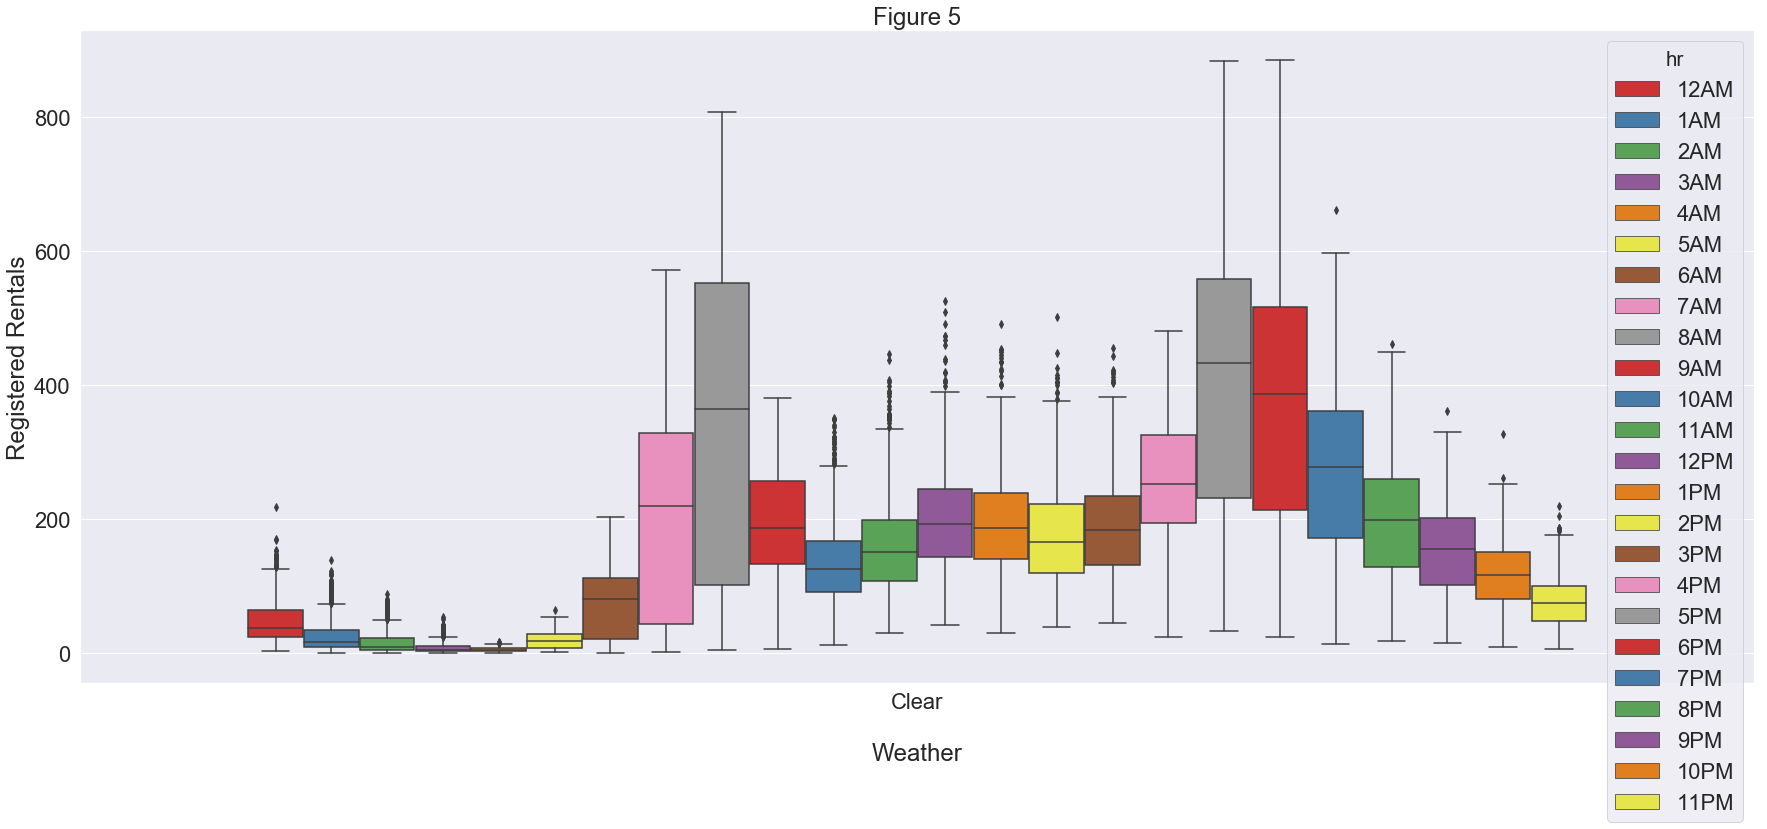

In [26]:
sns.set(font_scale=2)
plt.figure(figsize=(30,12))
# sns.boxplot(x=hr[(hr['weathersit']=='Clear') | (hr['weathersit']=='Mist+Cloudy')]['weathersit'],y='registered',data=hr,hue='hr',palette='Set1')
sns.boxplot(x=hr[hr['weathersit']=='Clear']['weathersit'],y='registered',data=hr,hue='hr',palette='Set1')
plt.title('Figure 5')
plt.xlabel('Weather',labelpad=30)
plt.ylabel('Registered Rentals')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='20')
plt.savefig('box_hr_reg_clr2')

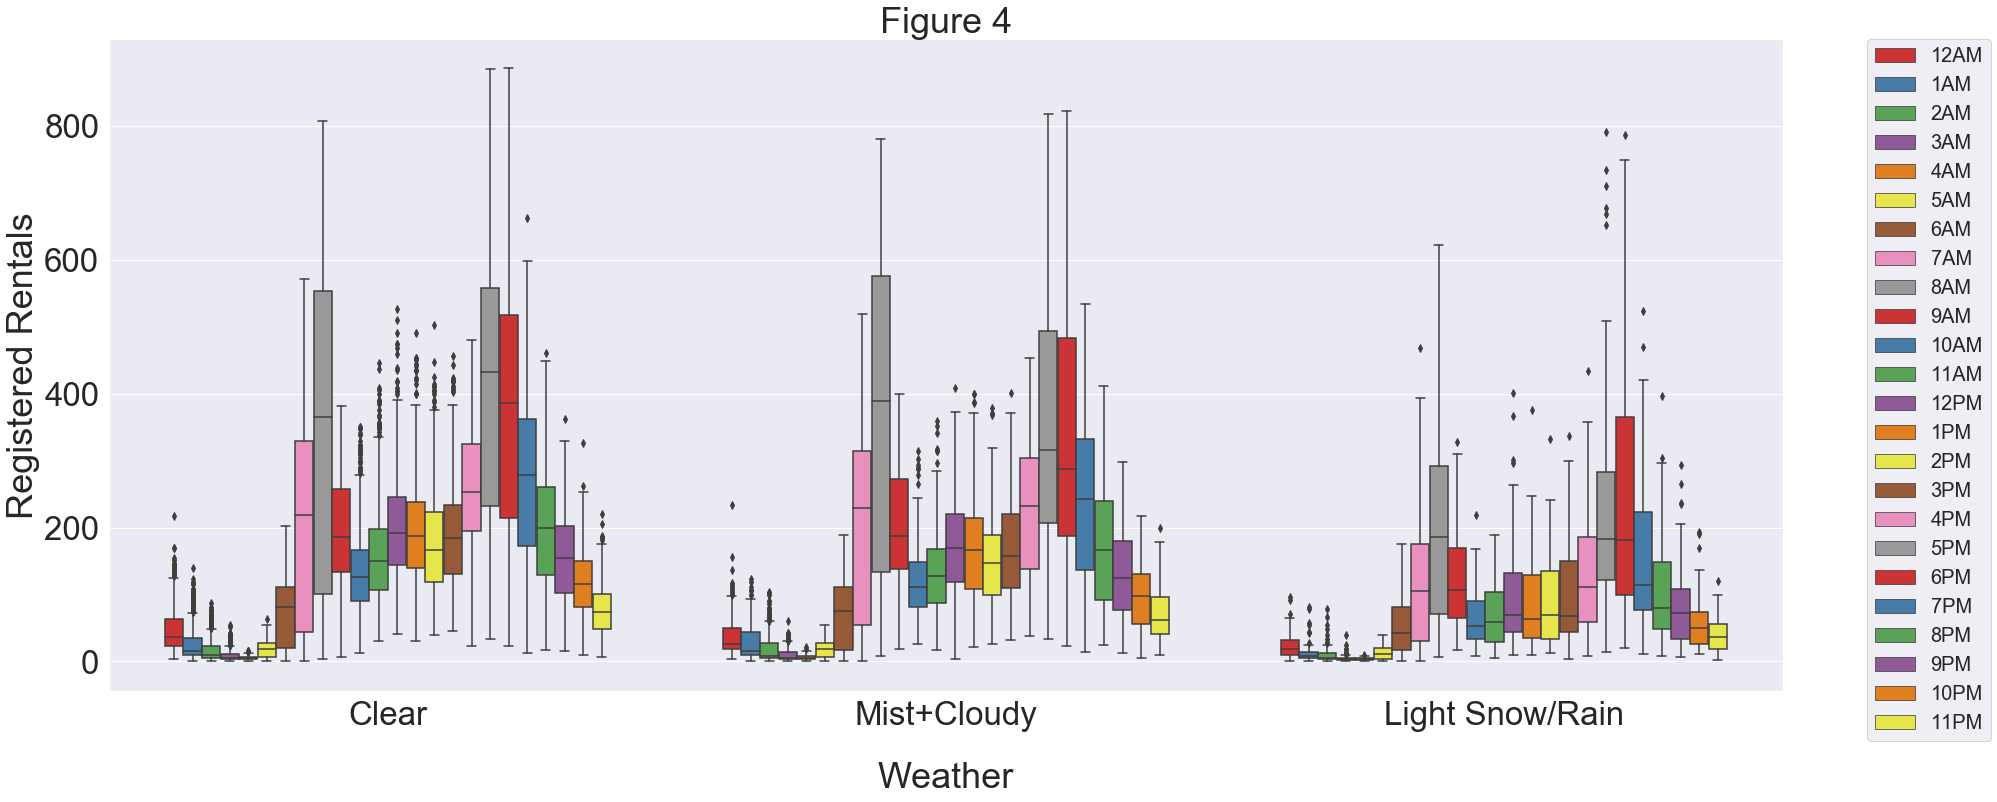

In [421]:
sns.set(font_scale=3)
plt.figure(figsize=(30,12))
sns.boxplot(x='weathersit',y='registered',data=hour,hue='hr',palette='Set1')
plt.title('Figure 4')
plt.xlabel('Weather',labelpad=30)
plt.ylabel('Registered Rentals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='20')
plt.savefig('Box_hr_weather_reg.png')

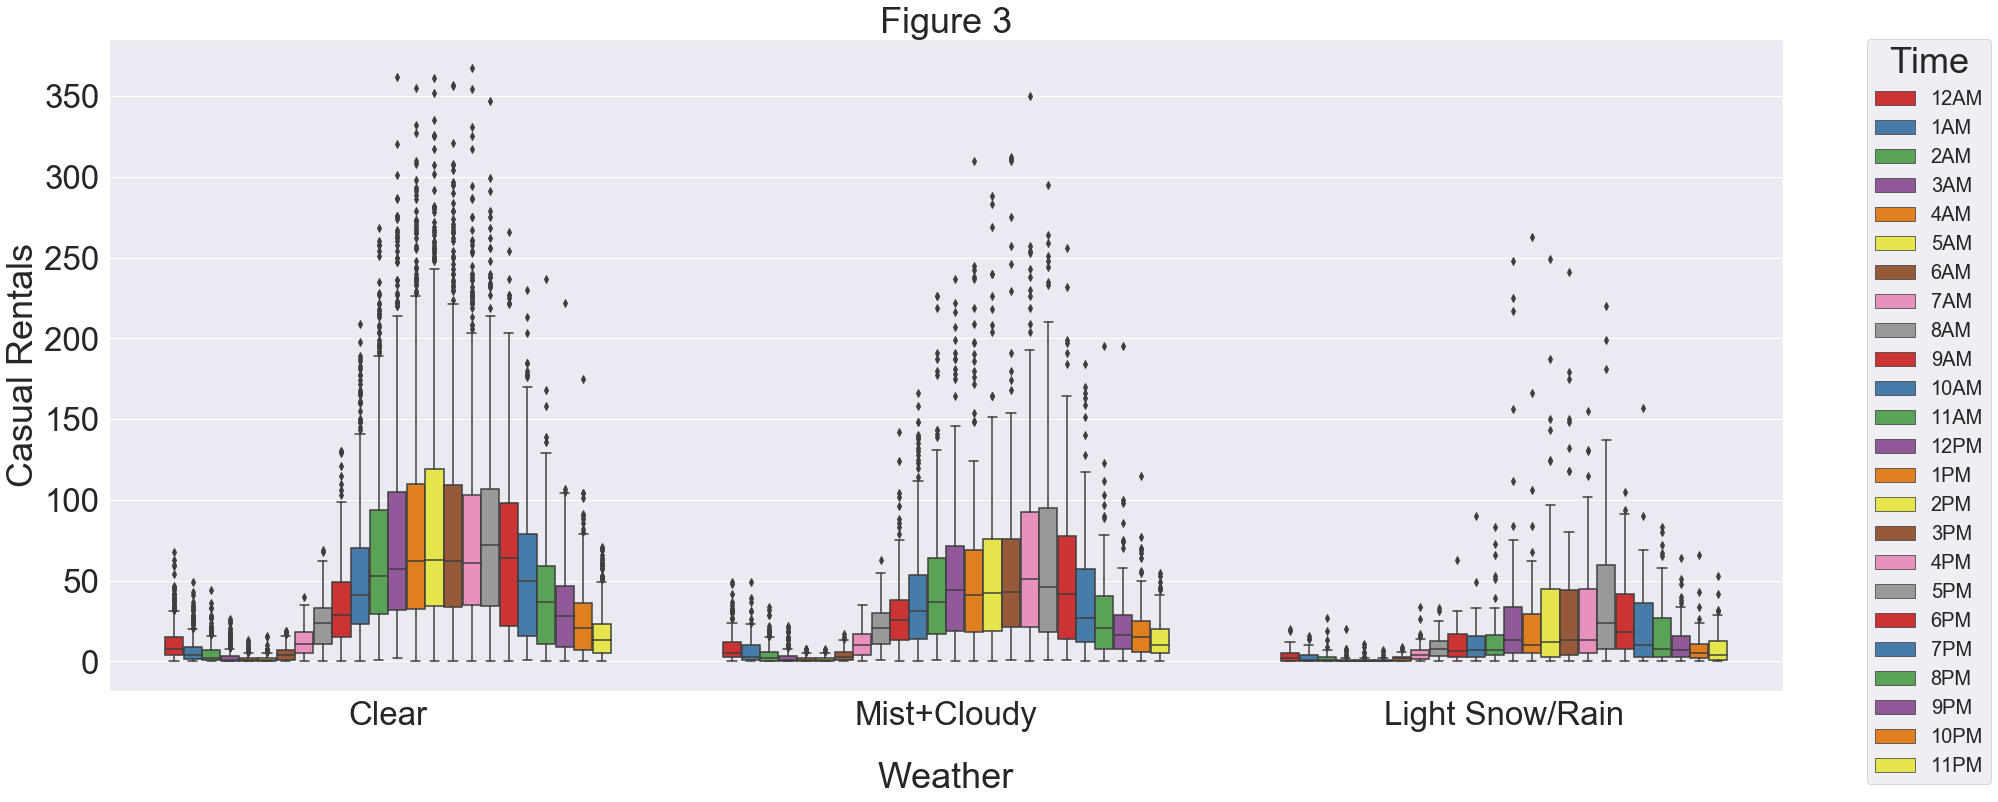

In [422]:
sns.set(font_scale=3)
plt.figure(figsize=(30,12))
sns.boxplot(x='weathersit',y='casual',data=hour,hue='hr',palette='Set1')
plt.title('Figure 3')
plt.xlabel('Weather',labelpad=30)
plt.ylabel('Casual Rentals')
plt.legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='20',title='Time')
plt.savefig('Box_hr_weather_cas.png')

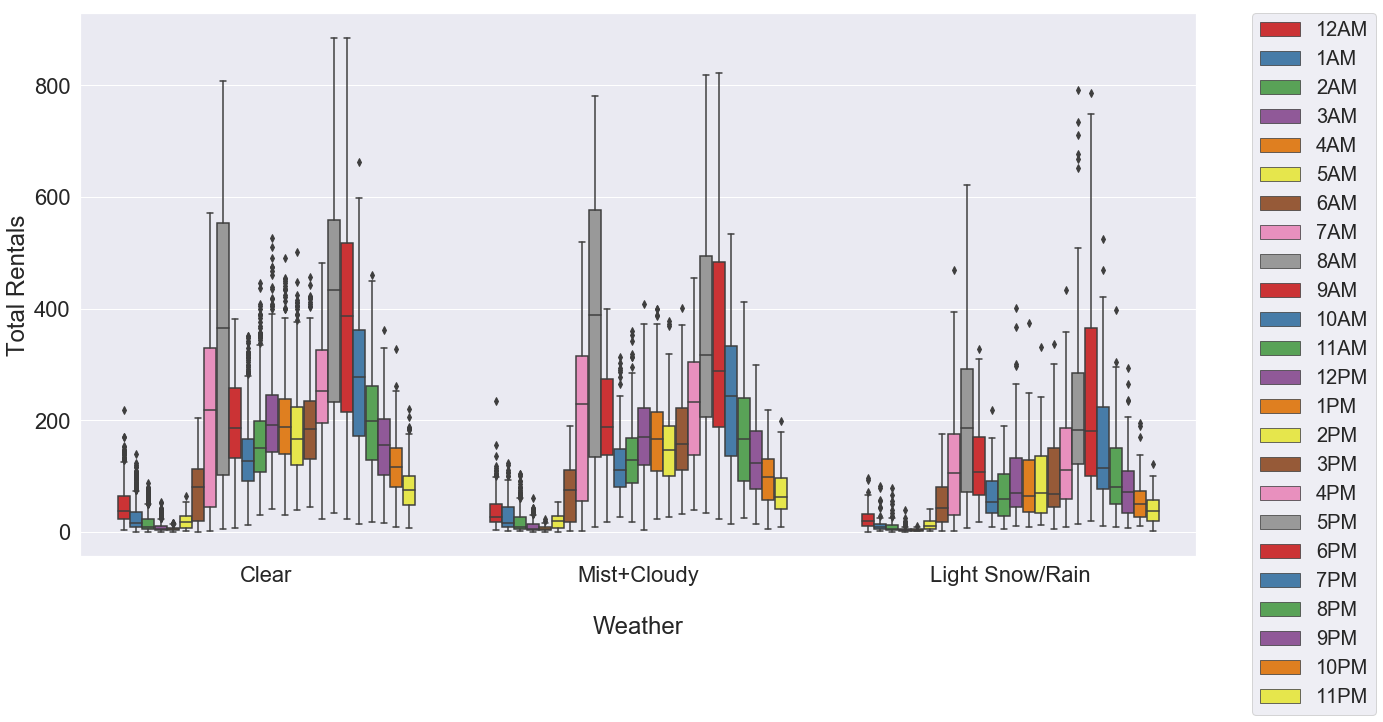

In [209]:
sns.set(font_scale=2)
plt.figure(figsize=(20,10))
sns.boxplot(x='weathersit',y='registered',data=hour,hue='hr',palette='Set1')
plt.xlabel('Weather',labelpad=30)
plt.ylabel('Total Rentals')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize='20')b

### **Data Analysis With Overall users**

Check for null values. There are no null values.

In [107]:
# sum with default axis=0, sums up all the values in a column
bike_prep.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

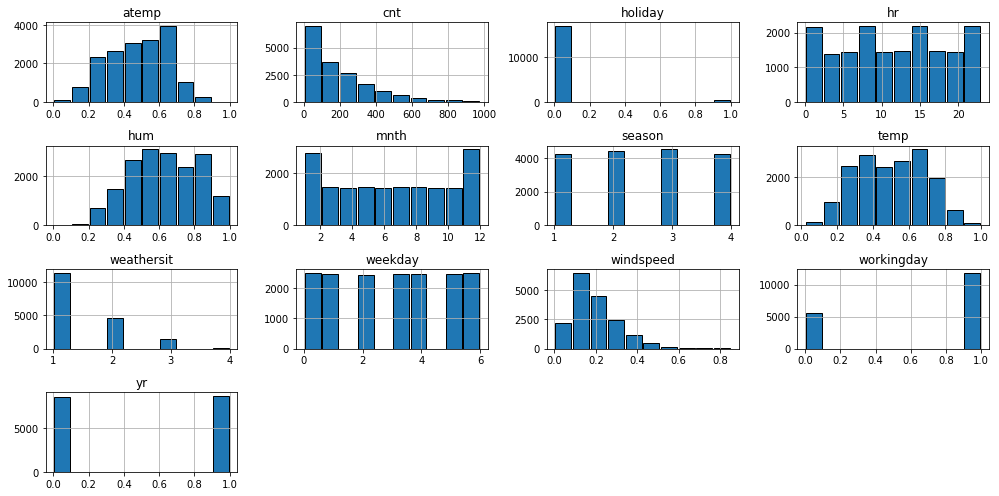

In [108]:
# note cnt is not normally distributed
bike_prep.hist(rwidth=0.9, figsize=(14,7))
plt.tight_layout()

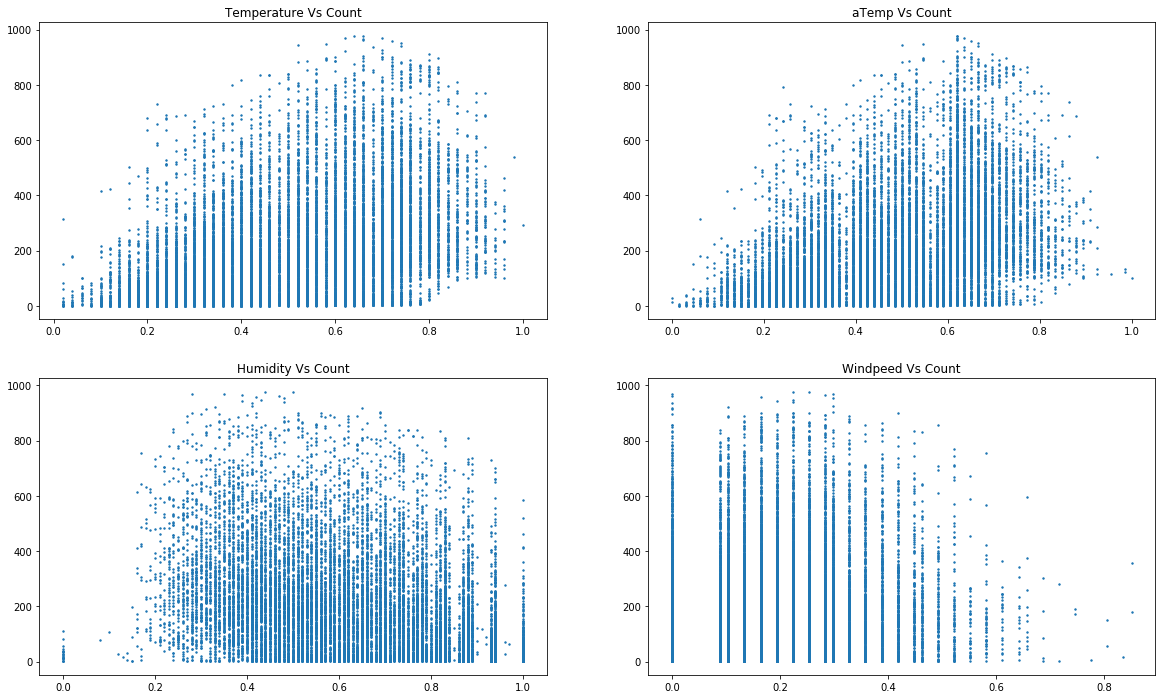

In [109]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
plt.title('Temperature Vs Count')
plt.scatter(bike_prep['temp'],bike_prep['cnt'], s=2)

plt.subplot(2,2,2)
plt.title('aTemp Vs Count')
plt.scatter(bike_prep['atemp'],bike_prep['cnt'], s=2)

plt.subplot(2,2,3)
plt.title('Humidity Vs Count')
plt.scatter(bike_prep['hum'],bike_prep['cnt'], s=2)

plt.subplot(2,2,4)
plt.title('Windpeed Vs Count')
plt.scatter(bike_prep['windspeed'],bike_prep['cnt'], s=2)

**Patterns** <br>
Notice:<br>
As Temperature goes up, so does the count. Also note aTemp and Temperature look fairly similar. Don't want Multicollinearity. 

As Windspeed goes up, count goes down.

Humidity seems to not have any effect on the count.

### **Now lets see the average count per categorical feature**

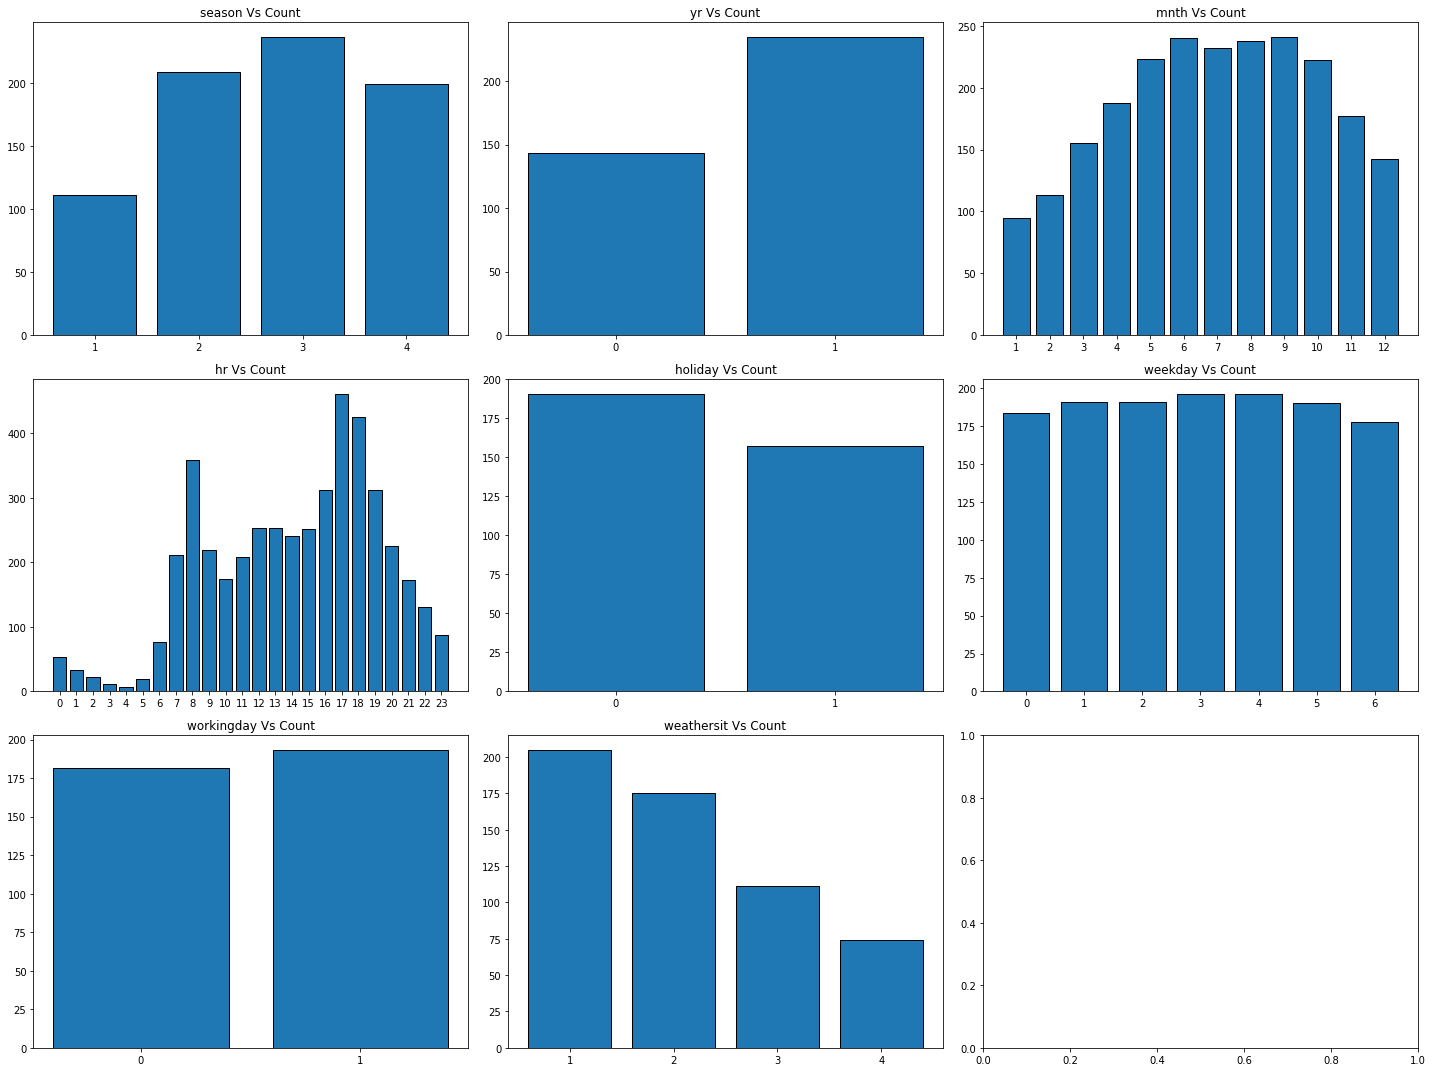

In [110]:
cat_columns = bike_prep.iloc[:,:8]

fig,axes = plt.subplots(3,3, figsize=(20,15))
for i in cat_columns.columns:
    x_i = cat_columns[i].unique()
    average_i = bike_prep.groupby(i).mean()['cnt']
    i_num = list(cat_columns.columns).index(i)

    if i_num < 3:
        axes[0,i_num].bar(x_i,average_i)
        axes[0, i_num].set_title(i + ' Vs Count')
        axes[0, i_num].set_xticks(x_i)
    elif i_num < 6:
        axes[1,i_num-3].bar(x_i,average_i)
        axes[1, i_num-3].set_title(i + ' Vs Count')
        axes[1, i_num-3].set_xticks(x_i)
    else:
        axes[2,i_num-6].bar(x_i,average_i)
        axes[2, i_num-6].set_title(i + ' Vs Count')
        axes[2, i_num-6].set_xticks(x_i)
        
plt.tight_layout()
# plt.savefig('testfig1')

**Features to be dropped**
* weekday
* yr - two years of data doesn't seem that important yet
* workingday
* atemp
* windspeed

Stock the bikes near public transport stations in the mornings, and near offices/businesses in the afternoon.

### **Check for outliers in dataset**

In [111]:
# we see 50% of data is between 40 and 281
bike_prep['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [112]:
# 5% of the data is below 5 bikes, while 99% of the data is below 782.22 bikes
# In other words: 5% of the time, the request for bikes is below 5bikes, 
# while 1% of the time the depand is above 782 bikes
# So these can be considered outliers and it might be worth removing them
bike_prep['cnt'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

### **Check Multicollinearity**
Liniarity using correlation coefficient matrix using corr

In [113]:
bike_prep[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


* temp and atemp have a near perfect correlation(0.987). This makes sense because atemp is just the 'feels like' temperature. So we will drop atemp.

* humidity and windspeed seem to be slightly correlated(-0.29). However, we see that windspeed has little to no correlation with count (0.093). So we will drop windspeed. 



In [114]:
bike_prep = bike_prep.drop(['weekday','yr','workingday','atemp','windspeed'],axis=1)

In [115]:
# The remaining columns
bike_prep.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


### **Check Auto-correlation in count ('cnt' column)**

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151952 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151952 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1a1f55ab70>)

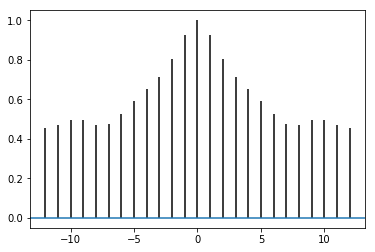

In [116]:
# We need to make sure the values are of type 'float'
# Convert cnt column into float
df1 = pd.to_numeric(bike_prep['cnt'],downcast ='float')
plt.acorr(df1, maxlags=12)

There is high Autocorrelation for the 'cnt' feature, the dependent variable.

### **Normality Problem**<br>
The cnt column isnt normally distributed. But it is Log-Normal distributed. Transform values into log values.

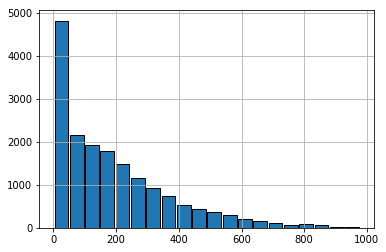

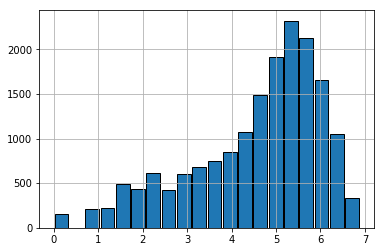

In [117]:
df1 = bike_prep['cnt']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9,bins=20)

plt.figure()
df2.hist(rwidth=0.9,bins=20)

In [118]:
bike_prep['cnt'] = np.log(bike_prep['cnt'])

In [119]:
bike_prep.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt
0,1,1,0,0,1,0.24,0.81,2.772589
1,1,1,1,0,1,0.22,0.80,3.688879
2,1,1,2,0,1,0.22,0.80,3.465736
3,1,1,3,0,1,0.24,0.75,2.564949
4,1,1,4,0,1,0.24,0.75,0.000000


### **Auto-correlation Fix by creating a Timelag dataset**

In [120]:
t_1 = bike_prep['cnt'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bike_prep['cnt'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bike_prep['cnt'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bike_prep,t_1,t_2,t_3],axis=1)

In [121]:
bikes_prep_lag.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879


In [122]:
# drop null values
bikes_prep_lag = bikes_prep_lag.dropna()

In [123]:
bikes_prep_lag.head()

,season,mnth,hr,holiday,weathersit,temp,hum,cnt,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


### **Create Dummy Variables**
The categorical variables need to be changed into dummy variables before training the ML model
<br>
<br>
drop_first = True <br>
We drop the first Column for each dummy variable set. Helping us avoid multicollinearity

In [124]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['mnth'] = bikes_prep_lag['mnth'].astype('category')
bikes_prep_lag['hr'] = bikes_prep_lag['hr'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weathersit'] = bikes_prep_lag['weathersit'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [126]:
# bikes_prep_lag.info()

### **Training a Linear Regression Model**

Because our data is time dependent, we can't split our data randomly. We grab a chunk of data from the start to train, then another chuck right above to testing predictions.

In [127]:
Y = bikes_prep_lag[['cnt']]
X = bikes_prep_lag.drop(['cnt'],axis=1)

In [128]:
tr_size = int(0.7 * len(X))

In [129]:
X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0:tr_size]
Y_test = Y.values[tr_size:len(Y)]

In [130]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train,Y_train)

r2_train = std_reg.score(X_train,Y_train)
r2_test = std_reg.score(X_test,Y_test)

Y_predict = std_reg.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y_test,Y_predict))

**Model Evaluation**

In [136]:
print('RMSE =',rmse)
print('R-Squared =',r2_test)

RMS = 0.38098800498170465
R-Squared = 0.9287151360253384


**Calculate RMSLE**<br>
We need to convert back from log

In [142]:
Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(np.exp(Y_test[i]))
    Y_predict_e.append(np.exp(Y_predict[i]))

In [143]:
log_sq_sum = 0.0
for i in range(0,len(Y_test_e)):
    log_a = np.log(Y_test_e[i]+1)
    log_p = np.log(Y_predict_e[i]+1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff
    
rmsle = np.sqrt(log_sq_sum/len(Y_test))

In [144]:
print('RMSLE =',rmsle[0])

RMSLE = 0.3560941706980212
